In [78]:
import matplotlib.pyplot as plt

In [79]:
import cv2
face_detector = cv2.CascadeClassifier("/Users/lakshyadujari/Desktop/Projects/NIC_AI/Facial Features/Facial-Features-Detection/haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier("/Users/lakshyadujari/Desktop/Projects/NIC_AI/Facial Features/Facial-Features-Detection/haarcascade_eye.xml")

In [124]:
img = cv2.imread("/Users/lakshyadujari/Desktop/Projects/NIC_AI/Facial Features/Facial-Features-Detection/img6.jpg")
img_raw = img.copy()

In [125]:
faces = face_detector.detectMultiScale(img, 1.3, 5)
if len(faces) > 0:
    face_x, face_y, face_w, face_h = faces[0]
    img = img[int(face_y):int(face_y+face_h), int(face_x):int(face_x+face_w)]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(img_gray)

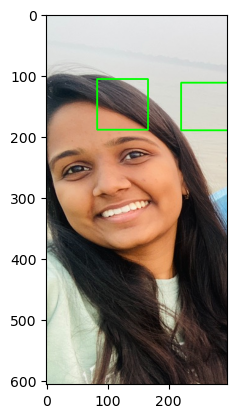

In [126]:
eyes = eye_detector.detectMultiScale(img_gray)

index = 0
eye_1 = ()
eye_2 = ()
for (eye_x, eye_y, eye_w, eye_h) in eyes:
   if index == 0:
      eye_1 = (eye_x, eye_y, eye_w, eye_h)
   elif index == 1:
      eye_2 = (eye_x, eye_y, eye_w, eye_h)
   cv2.rectangle(img,(eye_x, eye_y),(eye_x+eye_w, eye_y+eye_h), (0,255,0), 2)
   index = index + 1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [127]:
if eye_1[0] < eye_2[0]:
   left_eye = eye_1
   right_eye = eye_2
else:
   left_eye = eye_2
   right_eye = eye_1

In [128]:
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0]; left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]; right_eye_y = right_eye_center[1]
 
cv2.circle(img, left_eye_center, 2, (255, 0, 0) , 2)
cv2.circle(img, right_eye_center, 2, (255, 0, 0) , 2)
cv2.line(img,right_eye_center, left_eye_center,(67,67,67),2)

array([[[231, 231, 225],
        [231, 231, 225],
        [230, 230, 224],
        ...,
        [234, 232, 232],
        [234, 232, 232],
        [234, 232, 232]],

       [[231, 231, 225],
        [231, 231, 225],
        [230, 230, 224],
        ...,
        [234, 232, 232],
        [235, 233, 233],
        [234, 232, 232]],

       [[231, 231, 225],
        [231, 231, 225],
        [230, 230, 224],
        ...,
        [235, 233, 233],
        [235, 233, 233],
        [234, 232, 232]],

       ...,

       [[202, 224, 206],
        [197, 219, 201],
        [201, 223, 205],
        ...,
        [ 64,  72,  95],
        [ 56,  65,  85],
        [ 54,  60,  79]],

       [[206, 228, 210],
        [198, 220, 202],
        [198, 220, 202],
        ...,
        [ 63,  70,  95],
        [ 63,  72,  92],
        [ 56,  62,  81]],

       [[207, 229, 211],
        [205, 227, 209],
        [202, 224, 206],
        ...,
        [ 62,  69,  94],
        [ 58,  66,  89],
        [ 49,  55,  74]]

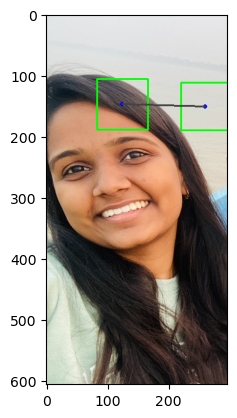

In [129]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [130]:
if left_eye_y < right_eye_y:
    point_3rd = (right_eye_x, left_eye_y)
    direction = -1 #rotate same direction to clock
    print("rotate to clock direction")
else:
    point_3rd = (left_eye_x, right_eye_y)
    direction = 1 #rotate inverse direction of clock
    print("rotate to inverse clock direction")
 
cv2.circle(img, point_3rd, 2, (255, 0, 0) , 2)
 
cv2.line(img,right_eye_center, left_eye_center,(67,67,67),2)
cv2.line(img,left_eye_center, point_3rd,(67,67,67),2)
cv2.line(img,right_eye_center, point_3rd,(67,67,67),2)

rotate to clock direction


array([[[231, 231, 225],
        [231, 231, 225],
        [230, 230, 224],
        ...,
        [234, 232, 232],
        [234, 232, 232],
        [234, 232, 232]],

       [[231, 231, 225],
        [231, 231, 225],
        [230, 230, 224],
        ...,
        [234, 232, 232],
        [235, 233, 233],
        [234, 232, 232]],

       [[231, 231, 225],
        [231, 231, 225],
        [230, 230, 224],
        ...,
        [235, 233, 233],
        [235, 233, 233],
        [234, 232, 232]],

       ...,

       [[202, 224, 206],
        [197, 219, 201],
        [201, 223, 205],
        ...,
        [ 64,  72,  95],
        [ 56,  65,  85],
        [ 54,  60,  79]],

       [[206, 228, 210],
        [198, 220, 202],
        [198, 220, 202],
        ...,
        [ 63,  70,  95],
        [ 63,  72,  92],
        [ 56,  62,  81]],

       [[207, 229, 211],
        [205, 227, 209],
        [202, 224, 206],
        ...,
        [ 62,  69,  94],
        [ 58,  66,  89],
        [ 49,  55,  74]]

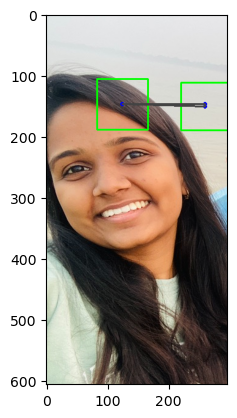

In [131]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [132]:
import math
def euclidean_distance(a, b):
    x1 = a[0]; y1 = a[1]
    x2 = b[0]; y2 = b[1]
    return math.sqrt(((x2 - x1) * (x2 - x1)) + ((y2 - y1) * (y2 - y1)))
a = euclidean_distance(left_eye_center, point_3rd)
b = euclidean_distance(right_eye_center, left_eye_center)
c = euclidean_distance(right_eye_center, point_3rd)

In [133]:
import numpy as np


cos_a = (b*b + c*c - a*a)/(2*b*c)
print("cos(a) = ", cos_a)
 
angle = np.arccos(cos_a)
print("angle: ", angle," in radian")
 
angle = (angle * 180) / math.pi
print("angle: ", angle," in degree")

cos(a) =  0.02961663203965086
angle:  1.5411753633657705  in radian
angle:  88.30284381039972  in degree


In [117]:
if direction == -1:
   angle = 90 - angle

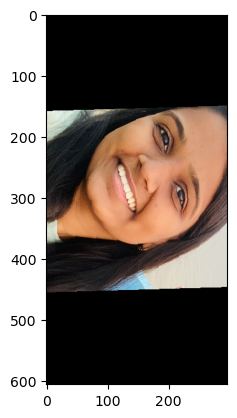

In [134]:
from PIL import Image
new_img = Image.fromarray(img_raw)
new_img = np.array(new_img.rotate(direction * angle))
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))